In [ ]:
'''
Biodiversity in U.S. National Parks

This project explores biodiversity patterns across several major U.S. national parks using species and observation data. Through data cleaning, merging, and exploratory analysis, I examined how species diversity, protection status, and observation frequency vary across parks and conservation categories.
'''

In [238]:
#Data Exploration
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')


print(observations.head(10))
print(observations.count())
print(observations.describe(include = 'all'))
print(species_info.head(10))
print(species_info.count())

print(observations.groupby('park_name')['scientific_name'].nunique())



                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

In [234]:
#Data Preparation
#Merge data
biodiversity = pd.merge(observations, species_info, on = 'scientific_name', how = 'inner')

#Drop Duplicates
biodiversity = biodiversity.drop_duplicates(subset=['scientific_name', 'park_name'])

#Clean Data
biodiversity.columns = biodiversity.columns.str.strip()
biodiversity.park_name = biodiversity.park_name.str.replace(" National Park", "", regex=False)

#Fill in missing data in Conservation Status
biodiversity['conservation_status'] = biodiversity['conservation_status'].fillna('No Intervention')


scientific_name        22164
park_name              22164
observations           22164
category               22164
common_names           22164
conservation_status    22164
dtype: int64


           scientific_name              park_name  observations  \
count                22164                  22164  22164.000000   
unique                5541                      4           NaN   
top     Vicia benghalensis  Great Smoky Mountains           NaN   
freq                     4                   5541           NaN   
mean                   NaN                    NaN    142.314835   
std                    NaN                    NaN     69.885082   
min                    NaN                    NaN      9.000000   
25%                    NaN                    NaN     86.000000   
50%                    NaN                    NaN    124.000000   
75%                    NaN                    NaN    195.000000   
max                    NaN                    NaN    321.000000   

              category        common_names conservation_status  
count            22164               22164               22164  
unique               7                5229                   5  


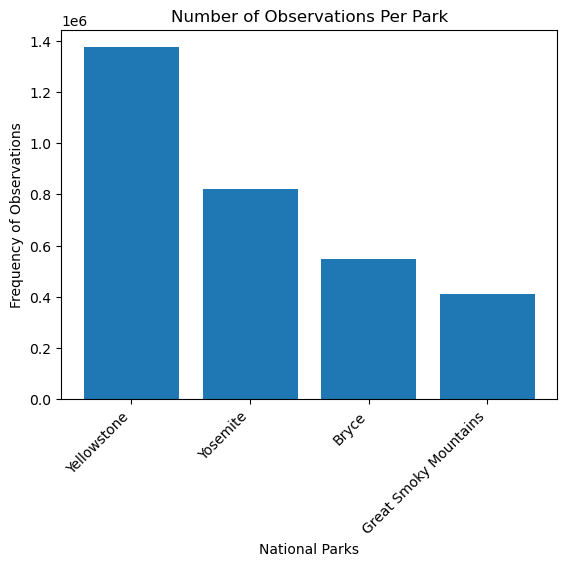

In [168]:
#Exploratory Analysis
print(biodiversity.describe(include='all'))

#Which parks have the highest total number of species observations?
park_observations = biodiversity.groupby('park_name')['observations'].sum().sort_values(ascending=False)
park_observations
print(park_observations)

plt.bar(park_observations.index, park_observations.values)
plt.title("Number of Observations Per Park")
plt.xlabel("National Parks")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Frequency of Observations")
plt.show()

category
Vascular Plant       76.917524
Bird                  8.807075
Nonvascular Plant     6.009746
Mammal                3.176322
Fish                  2.255910
Amphibian             1.425735
Reptile               1.407688
Name: scientific_name, dtype: float64


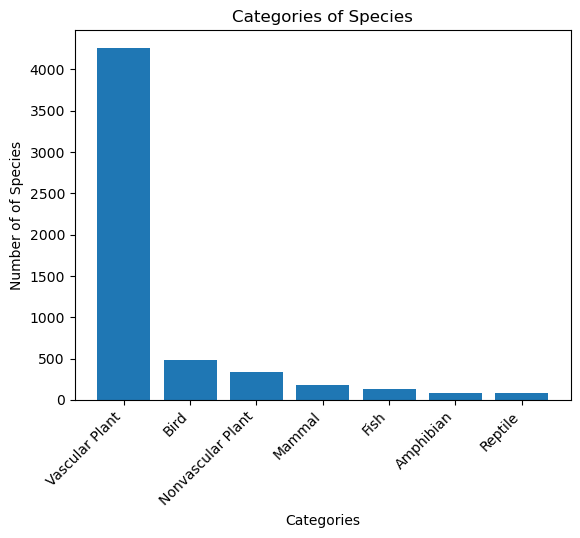

<Figure size 640x480 with 0 Axes>

In [246]:
#What categories of species are most common across parks?
category_counts = biodiversity.groupby('category')['scientific_name'].nunique().sort_values(ascending=False)
category_percent = (category_counts / category_counts.sum()) * 100
print(category_percent)


plt.bar(category_counts.index, category_counts.values)
plt.title("Categories of Species")
plt.xlabel("Categories")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of of Species")
plt.show()
plt.show()
plt.clf()

In [216]:
#What proportion of species are currently under protection in each park?

protected_species = biodiversity[biodiversity.conservation_status != "No Intervention"]
print(protected_species.count()/biodiversity.count()*100)


scientific_name        3.212417
park_name              3.212417
observations           3.212417
category               3.212417
common_names           3.212417
conservation_status    3.212417
dtype: float64
scientific_name        712
park_name              712
observations           712
category               712
common_names           712
conservation_status    712
dtype: int64
scientific_name        22164
park_name              22164
observations           22164
category               22164
common_names           22164
conservation_status    22164
dtype: int64


'\nplt.bar(protected_by_park.index, protected_by_park.values)\nplt.title("Number of Species Under Protection by Park")\nplt.xlabel("National Parks")\nplt.xticks(rotation=45, ha=\'right\')\nplt.ylabel("Number of Species Under Protection")\nplt.show()\nplt.show()\nplt.clf()\n'

In [225]:
#Which conservation statuses are most common in Yosemite National Park?
protected_species_yosemite = biodiversity[(biodiversity.conservation_status != "No Intervention") & (biodiversity.park_name == "Yosemite")]
print(protected_species_yosemite.conservation_status.value_counts())

conservation_status
Species of Concern    151
Endangered             15
Threatened              9
In Recovery             3
Name: count, dtype: int64


  conservation_status  observations
0          Endangered     37.000000
1         In Recovery    116.000000
2     No Intervention    143.141246
3  Species of Concern    128.248344
4          Threatened     70.166667


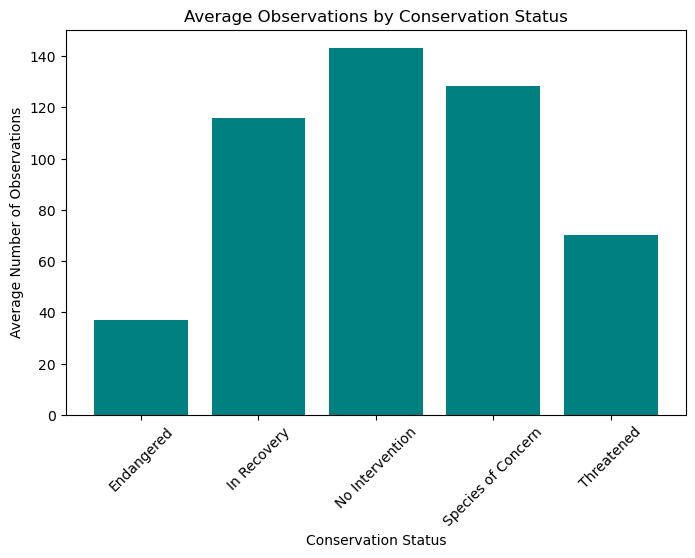

T-statistic: -10.38, P-value: 0.0000


In [240]:
#How do observation counts relate to conservation status — are protected species observed less frequently?
status_observations = biodiversity.groupby('conservation_status')['observations'].mean().reset_index()

print(status_observations)

plt.figure(figsize=(8,5))
plt.bar(status_observations['conservation_status'], status_observations['observations'], color='teal')
plt.title('Average Observations by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Average Number of Observations')
plt.xticks(rotation=45)
plt.show()

# Separate protected vs non-protected species
protected = biodiversity[biodiversity['conservation_status'] != 'No Intervention']['observations']
non_protected = biodiversity[biodiversity['conservation_status'] == 'No Intervention']['observations']

t_stat, p_val = ttest_ind(protected, non_protected, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")


In [247]:
'''
Insights & Takeaways

Yellowstone had the highest number of observations of species compared to other national parks, making up 43% of total observations.

Vascular plants make up the largest share of recorded species across all parks, making up 77% of all recorded species.

Most species are not currently under protection, only 3% of all species are under protection.

Species of concern are the most common conservation status in Yosemite Park.

When comparing average observation counts by conservation status, protected species (those listed under any conservation category) tend to have fewer observations on average than non-protected species. The bar chart shows a clear difference in mean observations between “No Intervention” species and those under protection. A two-sample t-test confirms this difference is statistically significant (p < 0.05), suggesting that protected species are observed less frequently — possibly reflecting their lower population sizes or more restricted habitats.
'''

'\nInsights & Takeaways\n\nYellowstone had the highest number of observations of species compared to other national parks, making up 43% of total observations.\n\nVascular plants make up the largest share of recorded species across all parks, making up 77% of all recorded species.\n\nMost species are not currently under protection, only 3% of all species are under protection.\n\nSpecies of concern are the most common conservation status in Yosemite Park.\n'